<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/one_shot_learning_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score

In [71]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

print(x_train.shape)


# Convert the output labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the input and output shapes
input_shape = (28, 28, 1)
num_classes = 10

(60000, 28, 28)
(60000, 28, 28)


In [72]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


(10, 28, 28)


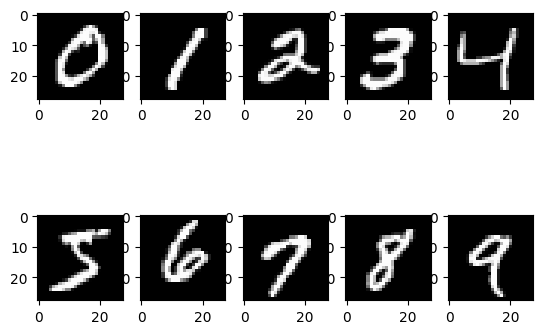

In [73]:
# Generate a single example for each class
data = []
labels = []
for i in range(num_classes):
    indices = np.where(y_train[:,i] == 1)[0]
    x = x_train[indices[0],:,:]
    y = to_categorical(i, num_classes=num_classes)
    data.append(x)
    labels.append(y)

# Train the model on the generated examples
data = np.array(data)
labels = np.array(labels)

print(data.shape)

# Reshape the images into 2D arrays (28x28)
images = data.reshape(-1, 28, 28)
# Plot the images using matplotlib
fig, axes = plt.subplots(nrows=2, ncols=5)
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
plt.show()

In [74]:
history = model.fit(data, labels, epochs=10, batch_size=num_classes)

Epoch 1/10
1/1 [==============================] - 0s 424ms/step - loss: 38.0519 - accuracy: 0.1000
Epoch 2/10
1/1 [==============================] - 0s 18ms/step - loss: 13.9201 - accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 0s 17ms/step - loss: 4.4737 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 19ms/step - loss: 0.0437 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 17ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 21ms/step - loss: 0.9961 - accuracy: 0.9000
Epoch 7/10
1/1 [==============================] - 0s 17ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 18ms/step - loss: 2.7943e-04 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 24ms/step - loss: 1.7463e-05 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 16ms/step - loss: 1.4424e-06 - accuracy: 1.0000


892
546


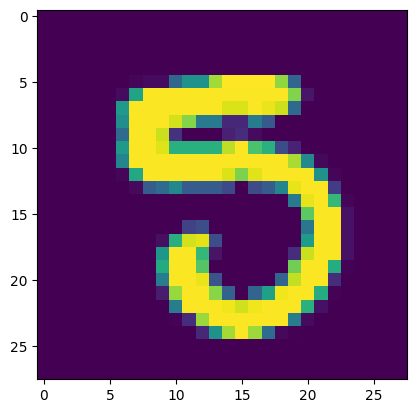

1/1 [==============================] - 0s 24ms/step
Predicted label =  [5]
1/1 [==============================] - 0s 33ms/step - loss: 0.2156 - accuracy: 1.0000
Test accuracy: 1.0


In [77]:
# Test the model on a new example
digit = 5
indices = np.where(y_test[:,digit] == 1)[0]
print(len(indices))
print(np.random.randint(0, len(indices)))
x_test_one = x_test[indices[np.random.randint(0, len(indices))],:,:]
y_test_one = to_categorical(digit, num_classes=num_classes)

x_test_one = np.array([x_test_one])
y_test_one = np.array([y_test_one])

plt.imshow(x_test_one.reshape(28, 28))
plt.show()

print('Predicted label = ', np.argmax(model.predict(x_test_one), axis=1))

loss, acc = model.evaluate(x_test_one, y_test_one)
print('Test accuracy:', acc)

In [66]:
y_pred = model.predict(x_test)
y__test = np.argmax(y_test,axis=1)
y__pred = np.argmax(y_pred,axis=1)
cm = confusion_matrix(y__test,y__pred)
print(cm)
print(classification_report(y__test,y__pred))


313/313 [==============================] - 3s 8ms/step
[[816   0   9   4  10   0   9  29   1 102]
 [  0 147 181 375   1  20   5 246 133  27]
 [ 58  13 617  85  65  24  24  90   8  48]
 [ 92   1  45 586  78  52   1  25  18 112]
 [  2   0  45   1 171   0   9 300  11 443]
 [ 52   0  37 159  26  33  34 272  54 225]
 [112   0 319   4  15   3 472  15   6  12]
 [  3   2  14   9  17   0   0 733   4 246]
 [ 14   0 111  53  54   1  21 314 168 238]
 [  2   0   4  10  15   1   2 373   6 596]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       980
           1       0.90      0.13      0.23      1135
           2       0.45      0.60      0.51      1032
           3       0.46      0.58      0.51      1010
           4       0.38      0.17      0.24       982
           5       0.25      0.04      0.06       892
           6       0.82      0.49      0.61       958
           7       0.31      0.71      0.43      1028
           8       0.41    